# Rat OGD VAMPIRE Analysis

Teng-Jui Lin

Created: 2022-05-20

Edited: 2022-10-04

Objective: Perform VAMPIRE analysis on the rat OGD model.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
from sklearn import manifold

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
vp.plot.set_plot_style()

In [4]:
img_set_path = r'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif'
output_path = r'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/4-vampire-analysis-data'

In [4]:
# extract properties from all images for future use
vp.extraction.extract_properties(img_set_path)

Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif
Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif


filename  image_id  label  centroid-y  \
0       4-59_3_40x_thalamus_5_yen_thresh.tif         0      1   20.604520   
1       4-59_3_40x_thalamus_5_yen_thresh.tif         0      2   47.279570   
2       4-59_3_40x_thalamus_5_yen_thresh.tif         0      3   96.621711   
3       4-59_3_40x_thalamus_5_yen_thresh.tif         0      4  170.970339   
4       4-59_3_40x_thalamus_5_yen_thresh.tif         0      5  183.589235   
...                                      ...       ...    ...         ...   
37551  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     58  457.909091   
37552  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     59  466.762295   
37553  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     60  503.466899   
37554  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     61  498.202247   
37555  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     62  500.077670   

       centroid-x  area  bbox_area  convex_area  filled_area   perimeter  ...  \
0      384.011299   177        399          348          177  118.669048  ...   
1      218.630824   279        374          304          279   66.941125  ...   
2      213.996711   304        441          329          304   67.491378  ...   
3      382.063559   236        342          263          236   59.976659  ...   
4      322.218130   353        483          365          353   68.183766  ...   
...           ...   ...        ...          ...          ...         ...  ...   
37551  167.449761   209        306          239          209   59.041631  ...   
37552  337.606557   244        342          265          244   61.769553  ...   
37553  323.243902   287        528          367          287   78.976659  ...   
37554    7.786517    89        195          126           89   44.006097  ...   
37555  295.558252   206        288          216          206   52.870058  ...   

       major_axis_length  minor_axis_length  orientation  euler_number  \
0              26.119535          21.108539     1.113104             1   
1              20.944416          17.171929     1.559710             1   
2              20.213588          19.376192    -1.160550             1   
3              18.190268          16.830708     1.155115             1   
4              22.011260          20.525073    -0.433177             1   
...                  ...                ...          ...           ...   
37551          19.748891          14.222769    -0.552463             1   
37552          18.334992          17.185241    -1.203300             1   
37553          24.865288          15.828205    -1.179497             1   
37554          17.256141           7.874673     0.989498             1   
37555          17.241348          15.482614    -1.080223             1   

       eccentricity  solidity    extent  \
0          0.588975  0.508621  0.443609   
1          0.572534  0.917763  0.745989   
2          0.284848  0.924012  0.689342   
3          0.379336  0.897338  0.690058   
4          0.361220  0.967123  0.730849   
...             ...       ...       ...   
37551      0.693787  0.874477  0.683007   
37552      0.348545  0.920755  0.713450   
37553      0.771229  0.782016  0.543561   
37554      0.889805  0.706349  0.456410   
37555      0.440009  0.953704  0.715278   

                                             raw_contour circularity  \
0      [[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, ...    0.157946   
1      [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,...    0.782399   
2      [[10, 11, 12, 13, 14, 15, 15, 16, 17, 17, 17, ...    0.838662   
3      [[11, 12, 13, 14, 15, 16, 17, 17, 18, 18, 17, ...    0.824437   
4      [[13, 14, 15, 16, 17, 18, 19, 19, 19, 20, 20, ...    0.954163   
...                                                  ...         ...   
37551  [[8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 15, 14...    0.753424   
37552  [[7, 8, 9, 10, 11, 12, 13, 13, 14, 15, 16, 17,...    0.803620   
37553  [[18, 18, 18, 19, 19, 19, 20, 21, 22, 21, 22, ...    0.578222   
37554  [[6, 

Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif
Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif


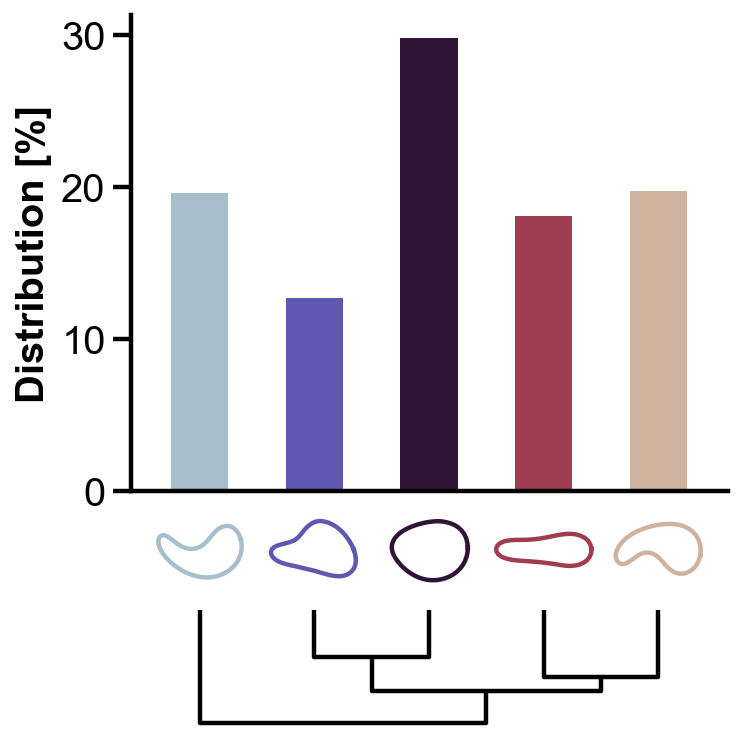

In [5]:
build_info_df = pd.DataFrame({
    'img_set_path': [img_set_path],
    'output_path': [output_path],
    'model_name': ['otsu'],
    'num_points': [np.nan],
    'num_clusters': [np.nan],
    'num_pc': [np.nan],
    'threshold': ['otsu'],
})
vp.quickstart.build_models(build_info_df, random_state=1)

In [6]:
model_path = os.path.join(output_path, 'model_otsu_(50_5_29)__otsu.pickle')
vampire_model = vp.util.read_pickle(model_path)

Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif
Contour and properties data already exist in path: /Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif


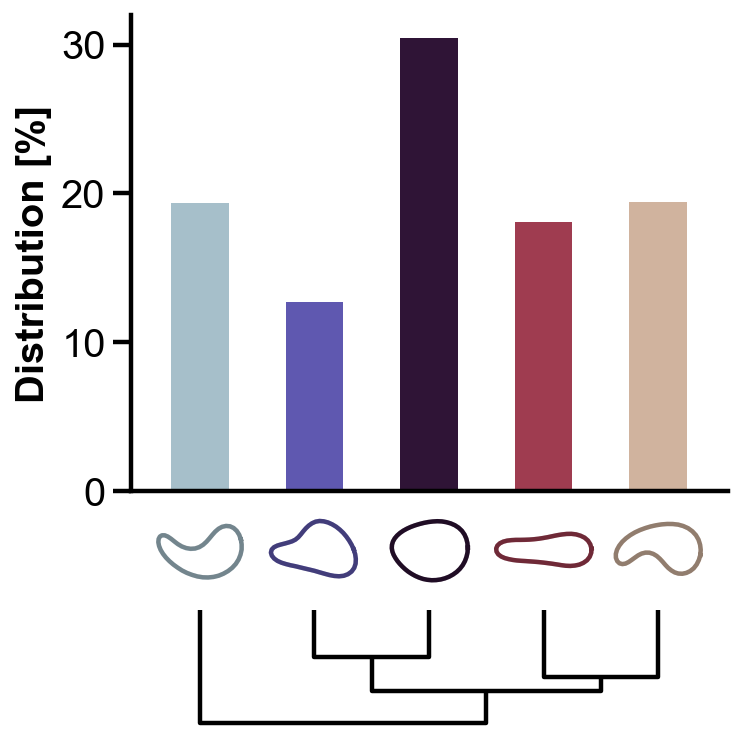

In [7]:
apply_info_df = pd.DataFrame({
    'img_set_path': [img_set_path],
    'model_path': [model_path],
    'output_path': [output_path],
    'img_set_name': ['otsu'],
})
vp.quickstart.apply_models(apply_info_df)

In [8]:
property_path = os.path.join(output_path, 'apply-properties_otsu_on_otsu_(50_5_29)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)
apply_properties_df

filename  image_id  label  centroid-y  \
0       4-59_3_40x_thalamus_5_yen_thresh.tif         0      1   20.604520   
1       4-59_3_40x_thalamus_5_yen_thresh.tif         0      2   47.279570   
2       4-59_3_40x_thalamus_5_yen_thresh.tif         0      3   96.621711   
3       4-59_3_40x_thalamus_5_yen_thresh.tif         0      4  170.970339   
4       4-59_3_40x_thalamus_5_yen_thresh.tif         0      5  183.589235   
...                                      ...       ...    ...         ...   
37551  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     58  457.909091   
37552  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     59  466.762295   
37553  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     60  503.466899   
37554  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     61  498.202247   
37555  4-56-2_40x_thalamus_1_otsu_thresh.tif       679     62  500.077670   

       centroid-x  area  bbox_area  convex_area  filled_area   perimeter  ...  \
0      384.011299   177        399          348          177  118.669048  ...   
1      218.630824   279        374          304          279   66.941125  ...   
2      213.996711   304        441          329          304   67.491378  ...   
3      382.063559   236        342          263          236   59.976659  ...   
4      322.218130   353        483          365          353   68.183766  ...   
...           ...   ...        ...          ...          ...         ...  ...   
37551  167.449761   209        306          239          209   59.041631  ...   
37552  337.606557   244        342          265          244   61.769553  ...   
37553  323.243902   287        528          367          287   78.976659  ...   
37554    7.786517    89        195          126           89   44.006097  ...   
37555  295.558252   206        288          216          206   52.870058  ...   

       eccentricity  solidity    extent  \
0          0.588975  0.508621  0.443609   
1          0.572534  0.917763  0.745989   
2          0.284848  0.924012  0.689342   
3          0.379336  0.897338  0.690058   
4          0.361220  0.967123  0.730849   
...             ...       ...       ...   
37551      0.693787  0.874477  0.683007   
37552      0.348545  0.920755  0.713450   
37553      0.771229  0.782016  0.543561   
37554      0.889805  0.706349  0.456410   
37555      0.440009  0.953704  0.715278   

                                             raw_contour  circularity  \
0      [[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, ...     0.157946   
1      [[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,...     0.782399   
2      [[10, 11, 12, 13, 14, 15, 15, 16, 17, 17, 17, ...     0.838662   
3      [[11, 12, 13, 14, 15, 16, 17, 17, 18, 18, 17, ...     0.824437   
4      [[13, 14, 15, 16, 17, 18, 19, 19, 19, 20, 20, ...     0.954163   
...                                                  ...          ...   
37551  [[8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 15, 14...     0.753424   
37552  [[7, 8, 9, 10, 11, 12, 13, 13, 14, 15, 16, 17,...     0.803620   
37553  [[18, 18, 18, 19, 19, 19, 20, 21, 22, 21, 22, ...     0.578222   
37554  [[6, 7, 8, 9, 10, 11, 12, 12, 13, 13, 14, 14, ...     0.577530   
37555  [[9, 10, 11, 12, 13, 14, 15, 16, 17, 17, 17, 1...     0.926099   

       aspect_ratio                                 normalized_contour  \
0          1.237392  [0.6015685298868785, 0.34081709532506077, 0.15...   
1          1.219689  [1.2043363430967842, 1.1744566647049817, 1.060...   
2          1.043218  [0.9835869688517785, 0.947284338016464, 0.9879...   
3          1.080779  [1.1026768364431876, 0.951599072960979, 0.8496...   
4          1.072408  [1.08371138991751, 1.0340129626520027, 0.99242...   
...             ...                                                ...   
37551      1.388540  [1.2440514831456184, 1.0994428662441456, 1.010...   
37552      1.066903  [1.025900343363227, 1.064686942862463, 1.00705...   
37553      1.570948  [1.2239015886949312, 1.2902770285506309, 1.286...   
3755

In [29]:
from skimage import io
import matplotlib.pyplot as plt

In [ ]:
img_set_path = ''


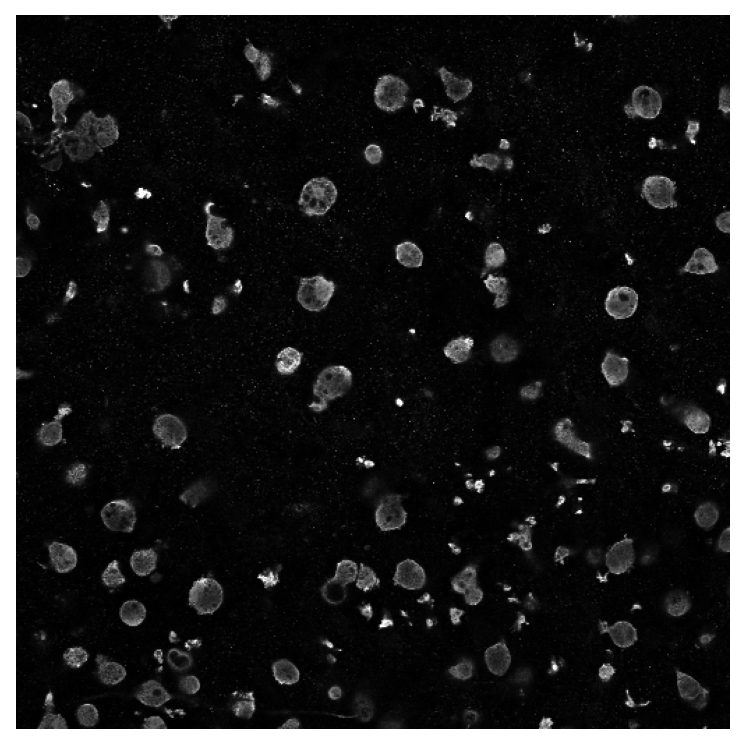

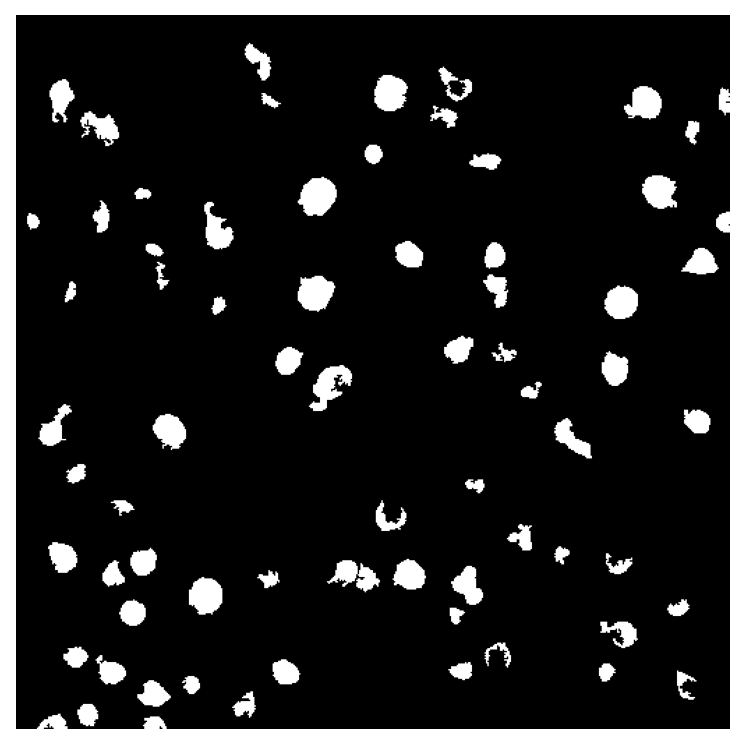

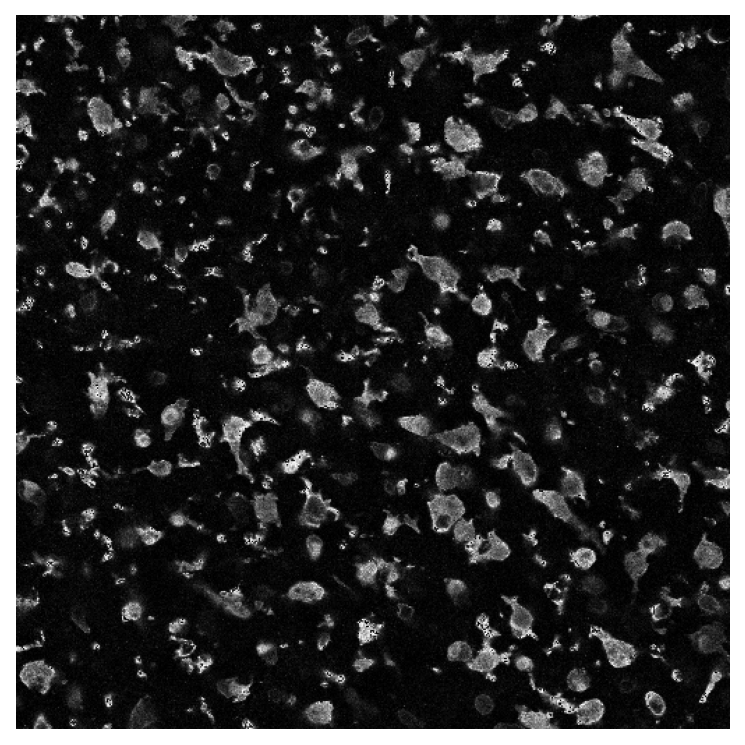

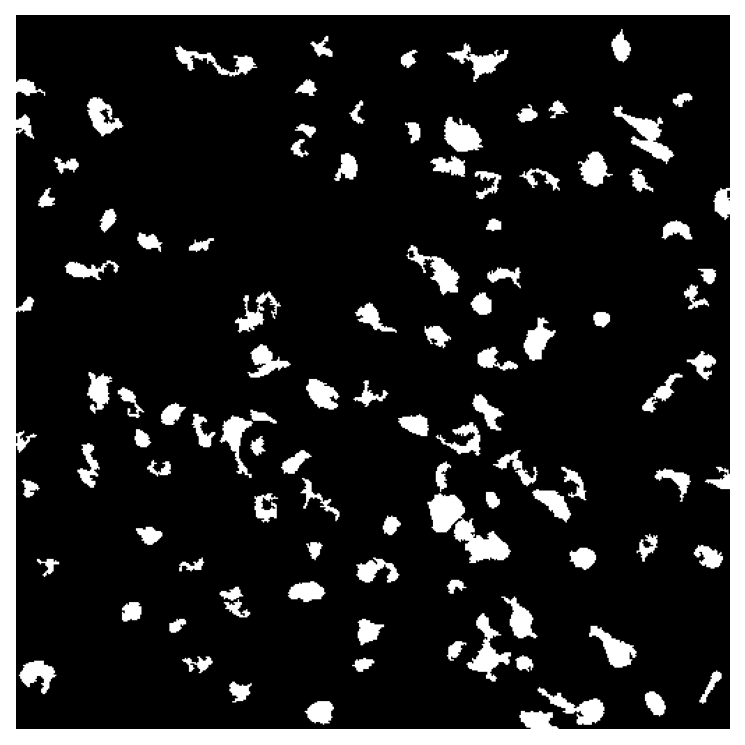

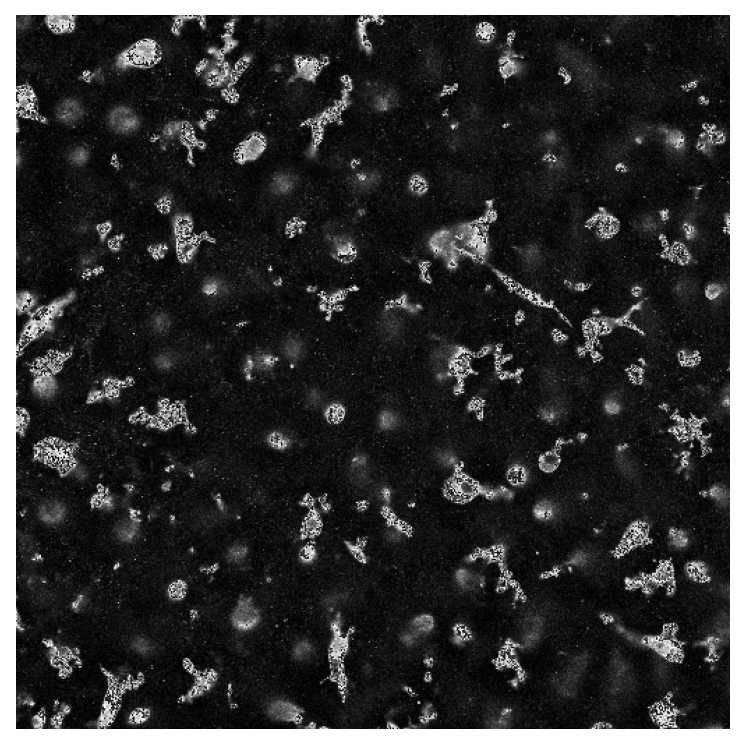

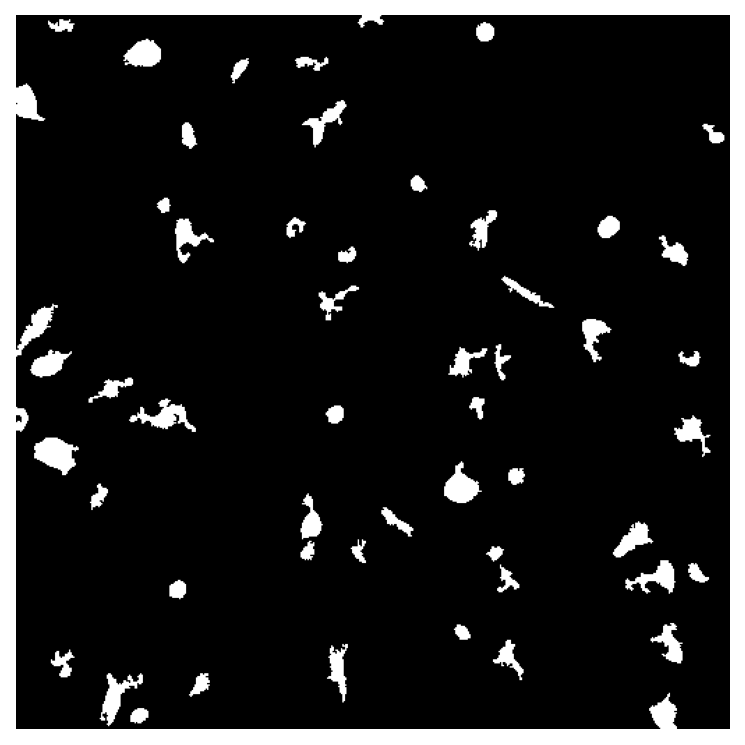

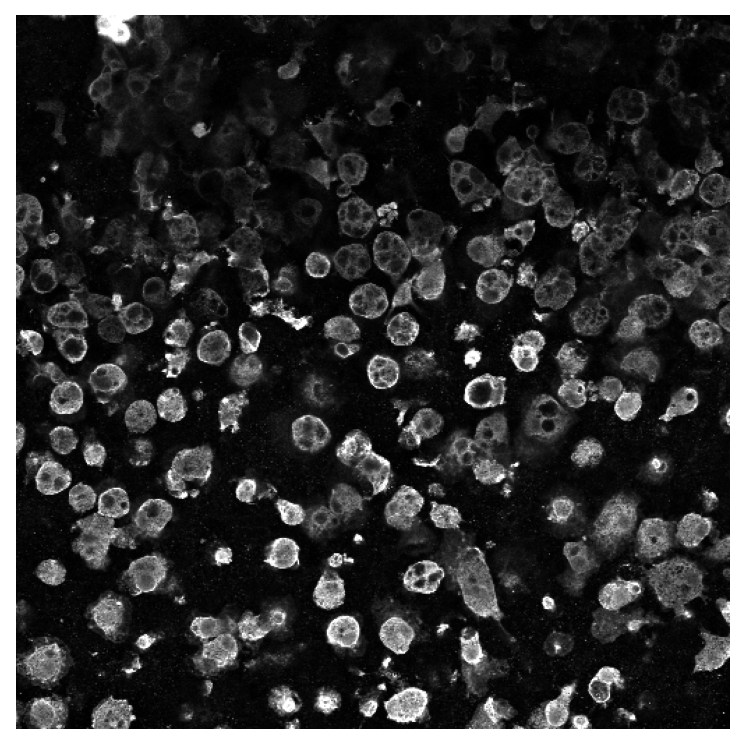

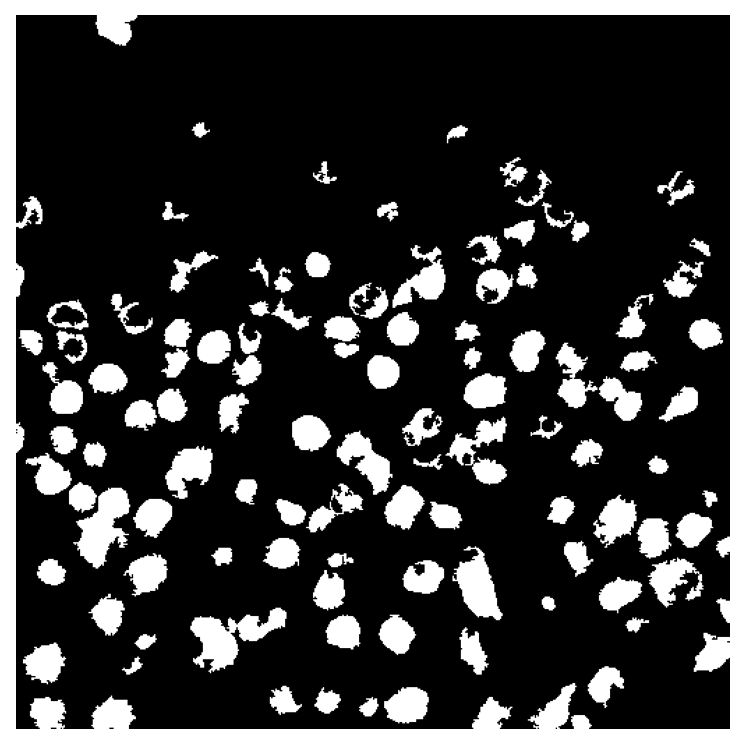

In [53]:
names = ['4-50-14_40x_cortex_1', '4-50-9_40x_cortex_4', '4-50-2_40x_cortex_5', '4-50-1_40x_cortex_1']
mult = [1, 100, 100, 1]
for i, name in enumerate(names):
    raw_img = io.imread(f'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/0-raw-data/{name}.tif')[:, :, 1] * mult[i]
    binary_img = io.imread(img_set_path + f'/{name}_otsu_thresh.tif') > 0

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(raw_img, cmap='gray')
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(f'{name}.png', dpi=1000, pad_inches=0, bbox_inches='tight')

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(binary_img, cmap='gray')
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(f'{name}_binary.png', dpi=1000, pad_inches=0, bbox_inches='tight')

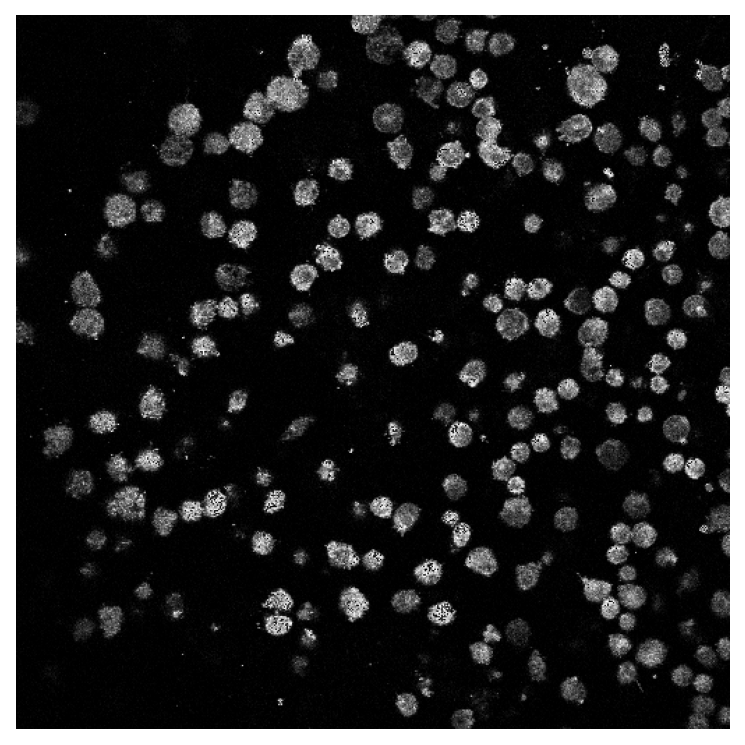

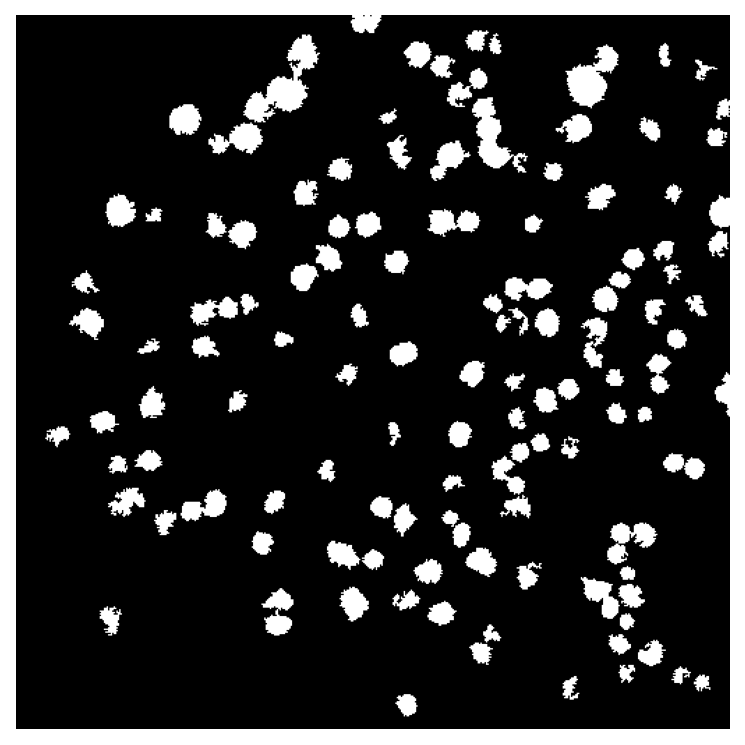

In [54]:
name = '4-59-3_40x_cortex_1'
raw_img = io.imread(f'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/0-raw-data/{name}.tif')[:, :, 1]*150
name = '4-59_3_40x_cortex_1'
binary_img = io.imread(img_set_path + f'/{name}_otsu_thresh.tif') > 0

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(raw_img, cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.savefig(f'{name}.png', dpi=1000, pad_inches=0, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(binary_img, cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.savefig(f'{name}_binary.png', dpi=1000, pad_inches=0, bbox_inches='tight')